Shape of text_image (512, 512, 3)

Shape of Background (512, 512, 3)

Time taken for computing between_class_variances for different thresholds is  0.012860100003308617

Binarized Text depth image is


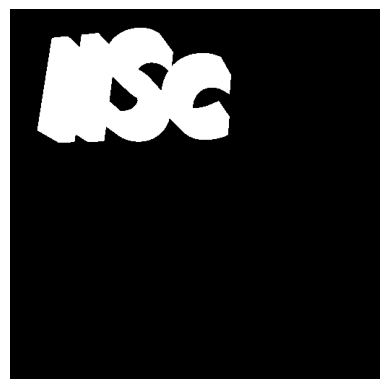

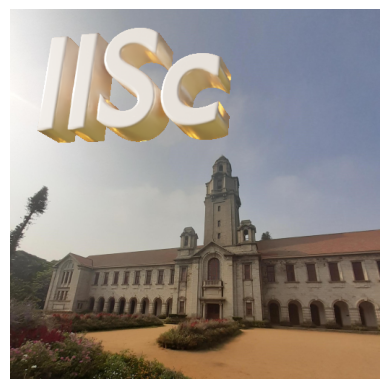

In [1]:
import numpy as np
from PIL import Image 
from timeit import default_timer as timer 
import matplotlib.pyplot as plt
import matplotlib.image as img


def compute_histogram(image, num_bins=256):
    # Initialize an array to store histogram values
    histogram = [0] * num_bins
    
    # Get image dimensions
    width = np.shape(image)[1]
    height = np.shape(image)[0]
    
    # Loop through each pixel and increment the histogram bin
    for y in range(height):
        for x in range(width):
            pixel_value = image[y][x]
            histogram[pixel_value] += 1
    
    return histogram

def calculate_between_class_variance(hist, thresholds):
    start = timer()
    
    total_pixels = np.sum(hist)
    total_mean = np.sum(np.arange(len(hist)) * hist) / total_pixels
    between_class_variances = []

    for t in thresholds:
        class1_pixels = np.sum(hist[:t])
        class2_pixels = total_pixels - class1_pixels

        if class1_pixels == 0 or class2_pixels == 0:
            between_class_variances.append(0)
            continue

        mean1 = np.sum(np.arange(t) * hist[:t]) / class1_pixels
        mean2 = np.sum(np.arange(t, len(hist)) * hist[t:]) / class2_pixels

        between_class_variances.append(((class1_pixels * (mean1 - total_mean)**2) + (class2_pixels * (mean2 - total_mean) ** 2))/total_pixels)
    
    end = timer()
    
    print("\nTime taken for computing between_class_variances for different thresholds is ",end - start)
    
    return between_class_variances

def binarized_image(image, threshold):
    dim1 = np.shape(image)[0]
    dim2 = np.shape(image)[1]
    for i in range(dim1):
        for j in range(dim2):
            if(image[i][j] >= threshold):
                image[i][j] = 255
            else:
                image[i][j] = 0
    print('\nBinarized Text depth image is')
    plt.gray()
    plt.axis('off')
    plt.imshow(image)
    plt.show()
    
    return image




def required(text_image, depth_image, background):
    
    depth_hist = compute_histogram(depth_image, num_bins=256)
    thresholds = np.arange(256)
    between_class_variances = calculate_between_class_variance(depth_hist, thresholds)
    binarized_depth_threshold = thresholds[np.argmax(between_class_variances)]
    depth_image = binarized_image(depth_image, binarized_depth_threshold)
    text_image = np.array(text_image)
    background = np.array(background)
    
    for i in range(np.shape(depth_image)[0]):
        for j in range(np.shape(depth_image)[1]):
            for k in range(np.shape(background)[2]):
                if depth_image[i][j] == 255:
                    background[i][j][k] = text_image[i][j][k] 
    return background
    
    
    

def main():
    
    text_image = Image.open('IIScText.png')
    background = Image.open('IIScMainBuilding.png')
    depth_image = Image.open('IIScTextDepth.png')
    depth_image = np.array(depth_image)
    
    print('Shape of text_image',np.shape(text_image))
    print('\nShape of Background',np.shape(background))
    
    overlayed_image = required(text_image, depth_image, background)
    plt.axis('off')
    plt.imshow(overlayed_image)
    plt.show()

    return 1
    
if __name__ == '__main__':
    main()
